# Shoe Classificaition [Convocutional Neural Network]

### Importing the Libraries

In [1]:
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ModelCheckpoint             
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.preprocessing import image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

### Loading the data

In [3]:
train_data_dir = r'C:\Users\HELLO\Desktop\New folder (2)\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train'
test_data_dir = r'C:\Users\HELLO\Desktop\New folder (2)\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test'


### Preprocessing

In [4]:
img_width, img_height = 150, 150   # Dimensions
batch_size = 32            # Hyperparameters
epochs = 20

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [6]:
# Preprocessing training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 623 images belonging to 3 classes.


In [7]:
# Preprocessing validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 155 images belonging to 3 classes.


In [8]:
# Preprocessing test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 0 images belonging to 0 classes.


### Visualing the Data

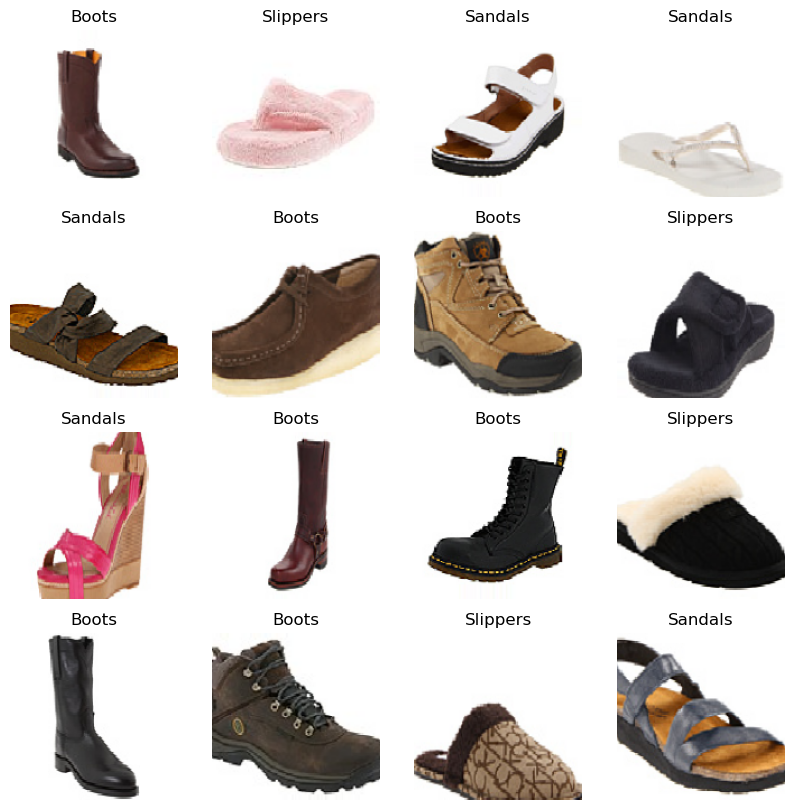

In [9]:
import matplotlib.pyplot as plt

batch =next(train_generator)

fig,axes =plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i , ax in enumerate(axes.flat):
    ax.imshow(batch[0][i])
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_generator.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
    
plt.show()

### Building the Model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

C:\Users\HELLO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compliling the model

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


###  Training the model

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20


C:\Users\HELLO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4091 - loss: 1.4723 - val_accuracy: 0.8281 - val_loss: 0.4719
Epoch 2/20
 1/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7500 - loss: 0.5935

C:\Users\HELLO\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7500 - loss: 0.5935 - val_accuracy: 0.7778 - val_loss: 0.5368
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7602 - loss: 0.5485 - val_accuracy: 0.8516 - val_loss: 0.3755
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8125 - loss: 0.4676 - val_accuracy: 0.8519 - val_loss: 0.2423
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8121 - loss: 0.3926 - val_accuracy: 0.9375 - val_loss: 0.3099
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9062 - loss: 0.3930 - val_accuracy: 0.8519 - val_loss: 0.4729
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8557 - loss: 0.3928 - val_accuracy: 0.7266 - val_loss: 0.6660
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8750 - loss: 0.2577 - val_accuracy: 0.9259 - val_loss: 0.2794
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8708 - loss: 0.3230 - val_accuracy: 0.8359 - val_loss: 0.4129

### Accuracy of the Model

In [13]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.8909 - loss: 0.3661
Validation Loss: 0.39437663555145264
Validation Accuracy: 0.9032257795333862


### Testing the model

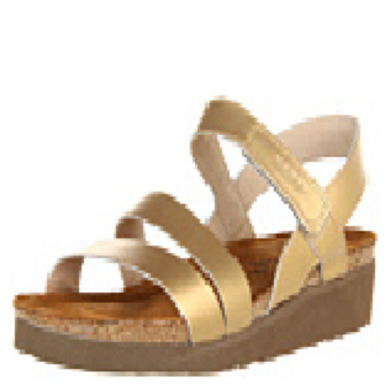

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted Class: 1


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the image
img_path = r"C:\Users\HELLO\Desktop\New folder (2)\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (27).jpg"
img = image.load_img(img_path, target_size=(img_width, img_height))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (assuming rescaling by 1/255)
img_array /= 255.

# Predict the class label
predicted_class = model.predict(img_array)
predicted_label = np.argmax(predicted_class)

# Print the predicted class
print("Predicted Class:", predicted_label)


### The above prediction is correct as sandals is denoted as class1

In [15]:
def load_image(filename, img_width, img_height):
    img = load_img(filename, target_size=(img_width, img_height))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Predicting for all images

In [17]:
test_images = os.listdir(test_data_dir)
for image_name in test_images:
    image_path = os.path.join(test_data_dir, image_name)
    image = load_image(image_path, img_width, img_height)  # Assuming img_width and img_height are defined
    predicted_class = model.predict(image)
    predicted_label = np.argmax(predicted_class)
    print(f"Image: {image_name}, Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (1).jpg, Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: image (10).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image (11).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (12).jpg, Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (13).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: image (14).jpg, Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (15).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image (16).jpg, Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (17).jpg, Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image (18).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: image (19).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: image (2).jpg, Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Imag

## The model is predicting with accuracy of  0.90

In [18]:
# Boot - 0
# Sandals - 1
# Slippers - 2